# Intensity Transformation part 01

## Identity Transformation

In this case, the output value of the pixel depends only the input value of that pixel . **Not it neighbors**  

Intensity transform of f(x) is denoted by T[f(x)]. Lets consider about identity transform ( T(.) = 1 )

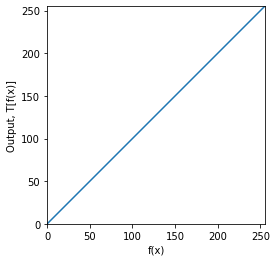

In [1]:
import cv2 as cv
import numpy as np
import matplotlib.pyplot as plt

#-----------------------------------------------------------------------------------------------------------

transform = np.arange(0, 256).astype("uint8") # create a vector of values from zero to 255 in  uint8 data type. each position of vector consiost the value same as position value. 

#-----------------------------------------------------------------------------------------------------------

fig, axes = plt.subplots() # creating suplots using matplotlib
axes.plot(transform)  # plot the values of vector 
axes.set_xlabel("f(x)")
axes.set_ylabel("Output, T[f(x)]")
axes.set_xlim(0,255)
axes.set_ylim(0,255)
axes.set_aspect("equal") # set the ratio of x axis and y axis units are equal
plt.show()

Using above transformation function try to apply it for image. Using opencv HighGUI

1. Look-up tables (LUTs) are very common in custom filters in which two pixels with the same value in the input involves the same value in the output too.

2. An LUT transformation assigns a new pixel value to each pixel in the input image according to the values given by a table. In this table, the index represents the input intensity value and the content of the cell given by the index represents the corresponding output value.

You can see there is no difference between original and transformed image. Because the transformation function is identity.

In [29]:
import cv2 as cv
import numpy as np
import matplotlib.pyplot as plt

#------------------------------------------------------------------------------------------------------------------------

transform = np.arange(0, 256).astype("uint8") 
image_original = cv.imread(".\image\ema.jpg", cv.IMREAD_GRAYSCALE)
print(image_original.shape)

#------------------------------------------------------------------------------------------------------------------------

cv.namedWindow("Image", cv.WINDOW_AUTOSIZE) # Showing original picture in grayscale using opencv HighGUI
cv.imshow("Image", image_original)
cv.waitKey(0)  #wait for a key press

#------------------------------------------------------------------------------------------------------------------------

image_transformed = cv.LUT(image_original, transform) # cv.LUT get original image that want to be transform as first parameter & transfer function as second parameter
cv.imshow("Image", image_transformed)
cv.waitKey(0)
cv.destroyAllWindows()

(1008, 1486)


Above code can also implement using matplotlib as follows

(1008, 1486)


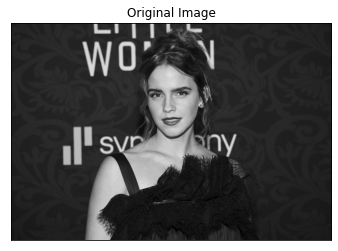

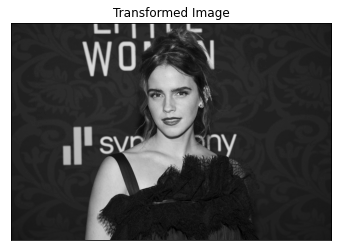

In [28]:
import cv2 as cv
import numpy as np
import matplotlib.pyplot as plt

#---------------------------------------------------------------------------------------------

transform = np.arange(0, 256).astype("uint8") 
image_original = cv.imread(".\image\ema.jpg", cv.IMREAD_GRAYSCALE)
print(image_original.shape)
plt.imshow(image_original, cmap="gray")  # shoud map color as gray
plt.title('Original Image')
plt.xticks([]), plt.yticks([])  # Remove the axes
plt.show()

#--------------------------------------------------------------------------------------------

image_transformed = cv.LUT(image_original, transform)
plt.imshow(image_transformed, cmap="gray")
plt.title('Transformed Image')
plt.xticks([]), plt.yticks([])
plt.show()

## Identity Transformation using numpy indexing

Instead of using look-up-tables we can use numpy to achieve target.  

Using transform[image_original] we can do it, where transform is the transformation vector & image_original is the input image(original image)  

Use original image as the index for transform vector and it gives corresponding value at given index as output of it.

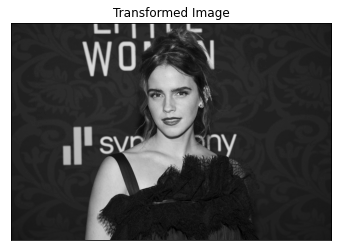

In [14]:
import cv2 as cv
import numpy as np
import matplotlib.pyplot as plt

#-----------------------------------------------------------------------------------------

transform = np.arange(0, 256).astype("uint8") 
image_original = cv.imread(".\image\ema.jpg", cv.IMREAD_GRAYSCALE)

#------------------------------------------------------------------------------------------

image_transformed = transform[image_original]
plt.imshow(image_transformed, cmap="gray")
plt.title('Transformed Image')
plt.xticks([]), plt.yticks([])
plt.show()

## Negative Transformation


Code is simillar as previous one. But the transform vector is different.  
In here also using matplotlib for implement pictures.

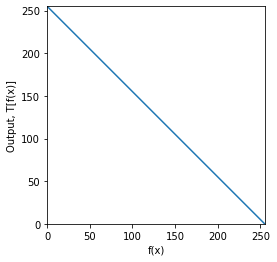

(1008, 1486)


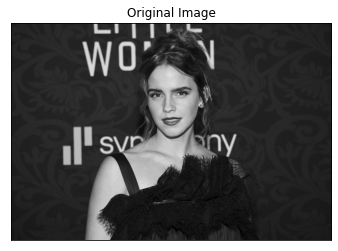

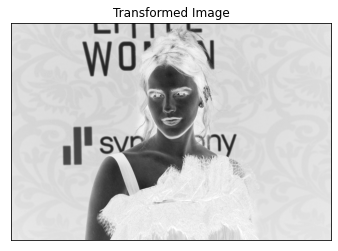

In [47]:
import cv2 as cv
import numpy as np
import matplotlib.pyplot as plt

#---------------------------------------------------------------------------------------------------------------

transform = np.arange(255,-1,-1).astype("uint8") # create a vector of values from 255 to 0 in  uint8 data type. each position of vector consiost the value same as position value. 

#--------------------------------------------------------------------------------------------------------------

fig, axes = plt.subplots() # creating suplots using matplotlib
axes.plot(transform)  # plot the values of vector 
axes.set_xlabel("f(x)")
axes.set_ylabel("Output, T[f(x)]")
axes.set_xlim(0,255)
axes.set_ylim(0,255)
axes.set_aspect("equal") # set the ratio of x axis and y axis units are equal
plt.show()

#--------------------------------------------------------------------------------------------------------------

image_original = cv.imread(".\image\ema.jpg", cv.IMREAD_GRAYSCALE)
print(image_original.shape)
plt.imshow(image_original, cmap="gray")  # shoud map color as gray
plt.title('Original Image')
plt.xticks([]), plt.yticks([])  # Remove the axes
plt.show()

#--------------------------------------------------------------------------------------------------------------

image_transformed = cv.LUT(image_original, transform) # cv.LUT get original image that want to be transform as first parameter & transfer function as second parameter
plt.imshow(image_transformed, cmap="gray")
plt.title('Transformed Image')
plt.xticks([]), plt.yticks([])
plt.show()





# Intensity Windowing

Instead of using identity and negative transformation we can use this also.  

In here there are three major transformations. We must have to study them separately by using corresponding coordinates and join tem for final transformation  

Using **np.concatenate((array1,array2,...), axis = 0, out = None)** we can join each transformations.  

* 1st paramter are arrays which want to join together and "axis" parameter says about the axis along which the arrays will be joined.  

* If axis is None, arrays are flattened before use. Default is 0 this is an optional parameter.  

* If last parameter provided, the destination to place the result. The shape must be correct, matching that of what concatenate would have returned if no out argument were specified. This also an optional parameter.

101
50
105
[  0   0   1   1   2   2   3   3   4   4   5   5   6   6   7   7   8   8
   9   9  10  10  11  11  12  12  13  13  14  14  15  15  16  16  17  17
  18  18  19  19  20  20  21  21  22  22  23  23  24  24  25  25  26  26
  27  27  28  28  29  29  30  30  31  31  32  32  33  33  34  34  35  35
  36  36  37  37  38  38  39  39  40  40  41  41  42  42  43  43  44  44
  45  45  46  46  47  47  48  48  49  49  50  51  54  57  60  63  66  69
  72  75  78  81  84  87  90  93  96  99 103 106 109 112 115 118 121 124
 127 130 133 136 139 142 145 148 152 155 158 161 164 167 170 173 176 179
 182 185 188 191 194 197 201 201 201 202 202 203 203 204 204 205 205 206
 206 207 207 208 208 209 209 210 210 211 211 212 212 213 213 214 215 215
 216 216 217 217 218 218 219 219 220 220 221 221 222 222 223 223 224 224
 225 225 226 226 227 228 228 229 229 230 230 231 231 232 232 233 233 234
 234 235 235 236 236 237 237 238 238 239 239 240 240 241 242 242 243 243
 244 244 245 245 246 246 247 247 248 248

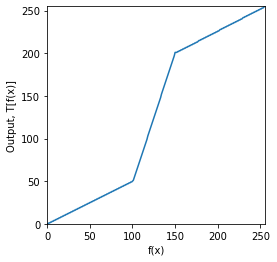

(1008, 1486)


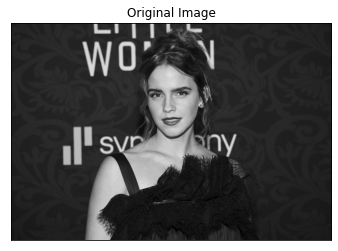

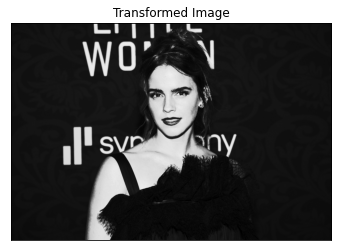

In [51]:
import cv2 as cv
import numpy as np
import matplotlib.pyplot as plt

#-----------------------------------------------------------------------------

coordinates = np.array([(100,50), (150,200)])  # define the coordinates which the transform function is changed
section01 = np.linspace(0, coordinates[0,1] , coordinates[0,0] + 1 - 0, dtype="uint8") # considering section 01, get the values form 0 to 50 to section 01 array as 100 values. It means map the input values from 0 to 50 to 0 to 100 as uint8 data type. it creates a linearly spaced array
print(len(section01))
section02 = np.linspace(coordinates[0,1] + 1, coordinates[1,1] + 1, coordinates[1,0] - coordinates[0,0], dtype="uint8") # create section 02 transform vwctor. get the values of input from 51 to 200 and map them in to (150-100) = 50 values. it creates a linearly spaced array
print(len(section02))
section03 = np.linspace(coordinates[1,1] + 1, 255, 255 - coordinates[1,0], dtype="uint8") # Create last section.
print(len(section03))

#-----------------------------------------------------------------------------

transform = np.concatenate((section01,section02, section03), axis = 0).astype("uint8")  # join all the arrys which define each transform seperately as one array
print(transform)

#----------------------------------------------------------------------------

fig, axes = plt.subplots() # creating suplots using matplotlib
axes.plot(transform)  # plot the values of transform vector 
axes.set_xlabel("f(x)")
axes.set_ylabel("Output, T[f(x)]")
axes.set_xlim(0,255)
axes.set_ylim(0,255)
axes.set_aspect("equal") # set the ratio of x axis and y axis units are equal
plt.show()

#----------------------------------------------------------------------------

image_original = cv.imread(".\image\ema.jpg", cv.IMREAD_GRAYSCALE)
print(image_original.shape)
plt.imshow(image_original, cmap="gray")  # shoud map color as gray
plt.title('Original Image')
plt.xticks([]), plt.yticks([])  # Remove the axes
plt.show()

#--------------------------------------------------------------------------------------------------------------

image_transformed = cv.LUT(image_original, transform)
plt.imshow(image_transformed, cmap="gray")
plt.title('Transformed Image')
plt.xticks([]), plt.yticks([])
plt.show()
